# Initial Data Analysis

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
from sklearn import metrics

from sklearn import model_selection
from sklearn.cluster import KMeans

from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import completeness_score, homogeneity_score

# Import

In [3]:
data = pd.read_csv('data/aviation_data.csv', index_col='id')
data = data.drop(data.columns[0], axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
print('This dataset contains {} observations and {} attributes'.format(*data.shape))

This dataset contains 129880 observations and 23 attributes


#### Datatypes

In [4]:
print(data.dtypes)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

Most of the variables have an integer data type. There are 5 object types that represent categorical variables.

# Preprocessing

#### Checking for missing values

In [4]:
print(data.isnull().sum()) # checks for null values
data = data.dropna() # drop rows that contain missing values

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


There are very few null observations. As seen below, only 393 instances under 'Arrival Delay in Minutes' were found to
have null values.  Due to the large dataset, it would be best to drop any instances where null values exist.

#### Dummify

In [5]:
data_dummies = pd.get_dummies(data) # applying one hot encoding
data_dummies = data_dummies.astype('int64') # converting all dataypes to int
data_dummies.head()
data_dummies.to_csv('data/aviation_data_dummies.csv')

#### Datatypes of the dummies

In [7]:
print(data_dummies.dtypes)

Age                                     int64
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes                int64
Gender_Female                           int64
Gender_Male                             int64
Customer Type_Loyal Customer            int64
Customer Type_disloyal Customer   

All the variables are of int64 datatype

### Seperate Target, Predictors, Feature names

In [6]:
target = data_dummies['satisfaction_satisfied']
# dropping the target variable to seperate out the predictors
predictors = data_dummies.drop(['satisfaction_satisfied','satisfaction_neutral or dissatisfied'], axis=1)
feature_names = predictors.columns.to_numpy(dtype=str) # getting feature names for later use

### Split to Train / Test sets

In [7]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=7, shuffle=True)

### Min-Max Scaling

In [8]:
scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train) # scaling the training subset
X_test_s = scaler.fit_transform(X_test) # scaling the testing subset

# convert target variables to numpy
y_train = y_train.values
y_test = y_test.values

np.save('data/X_train_s.npy', X_train_s)
np.save('data/X_test_s.npy', X_test_s)
np.save('data/y_train.npy', y_train)
np.save('data/y_test.npy', y_test)

np.save('data/feature_names.npy', feature_names)

# Data Exploration

## Distributions

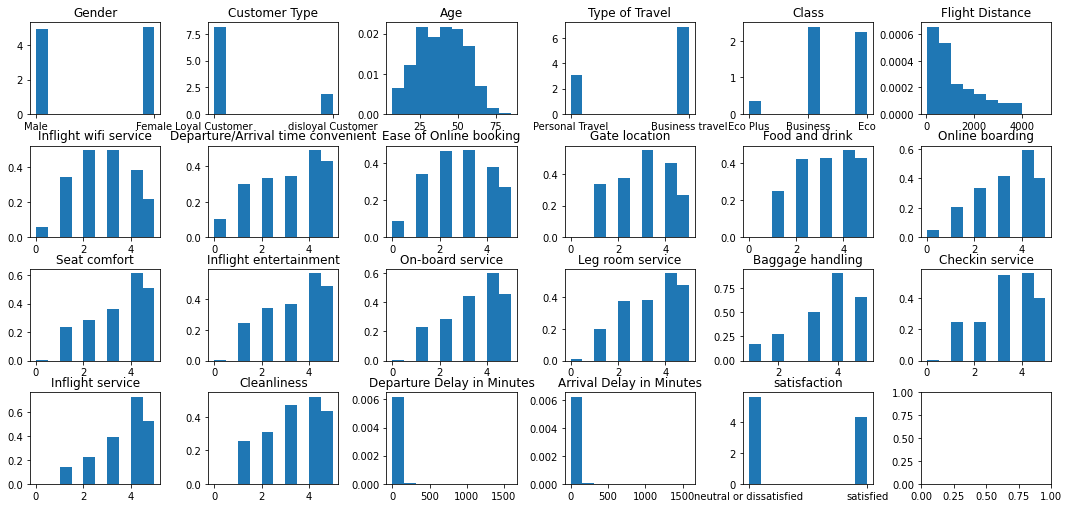

In [10]:
rows, columns = 4,6
# Show the distribution for all attributes
fig, axs = plt.subplots(rows,columns, figsize=(15,7))   # initialize 4 by 6 plot grid
fig.tight_layout()                                      # set layout
column_names = [column for column in data]              # Get column names into list
i = 0
for x in range(rows):                                   # Fill plot grid
    for y in range(columns):
        if i < data.shape[1]:
            axs[x,y].hist(data[column_names[i]], density=True)
            axs[x,y].set(title=column_names[i])
            i += 1

The final dataset consists of 23 attributes and 129,487 observations. 18 are categorical attributes of which 5 are nominal and 13 are ordinal. 5 features are
numerical.

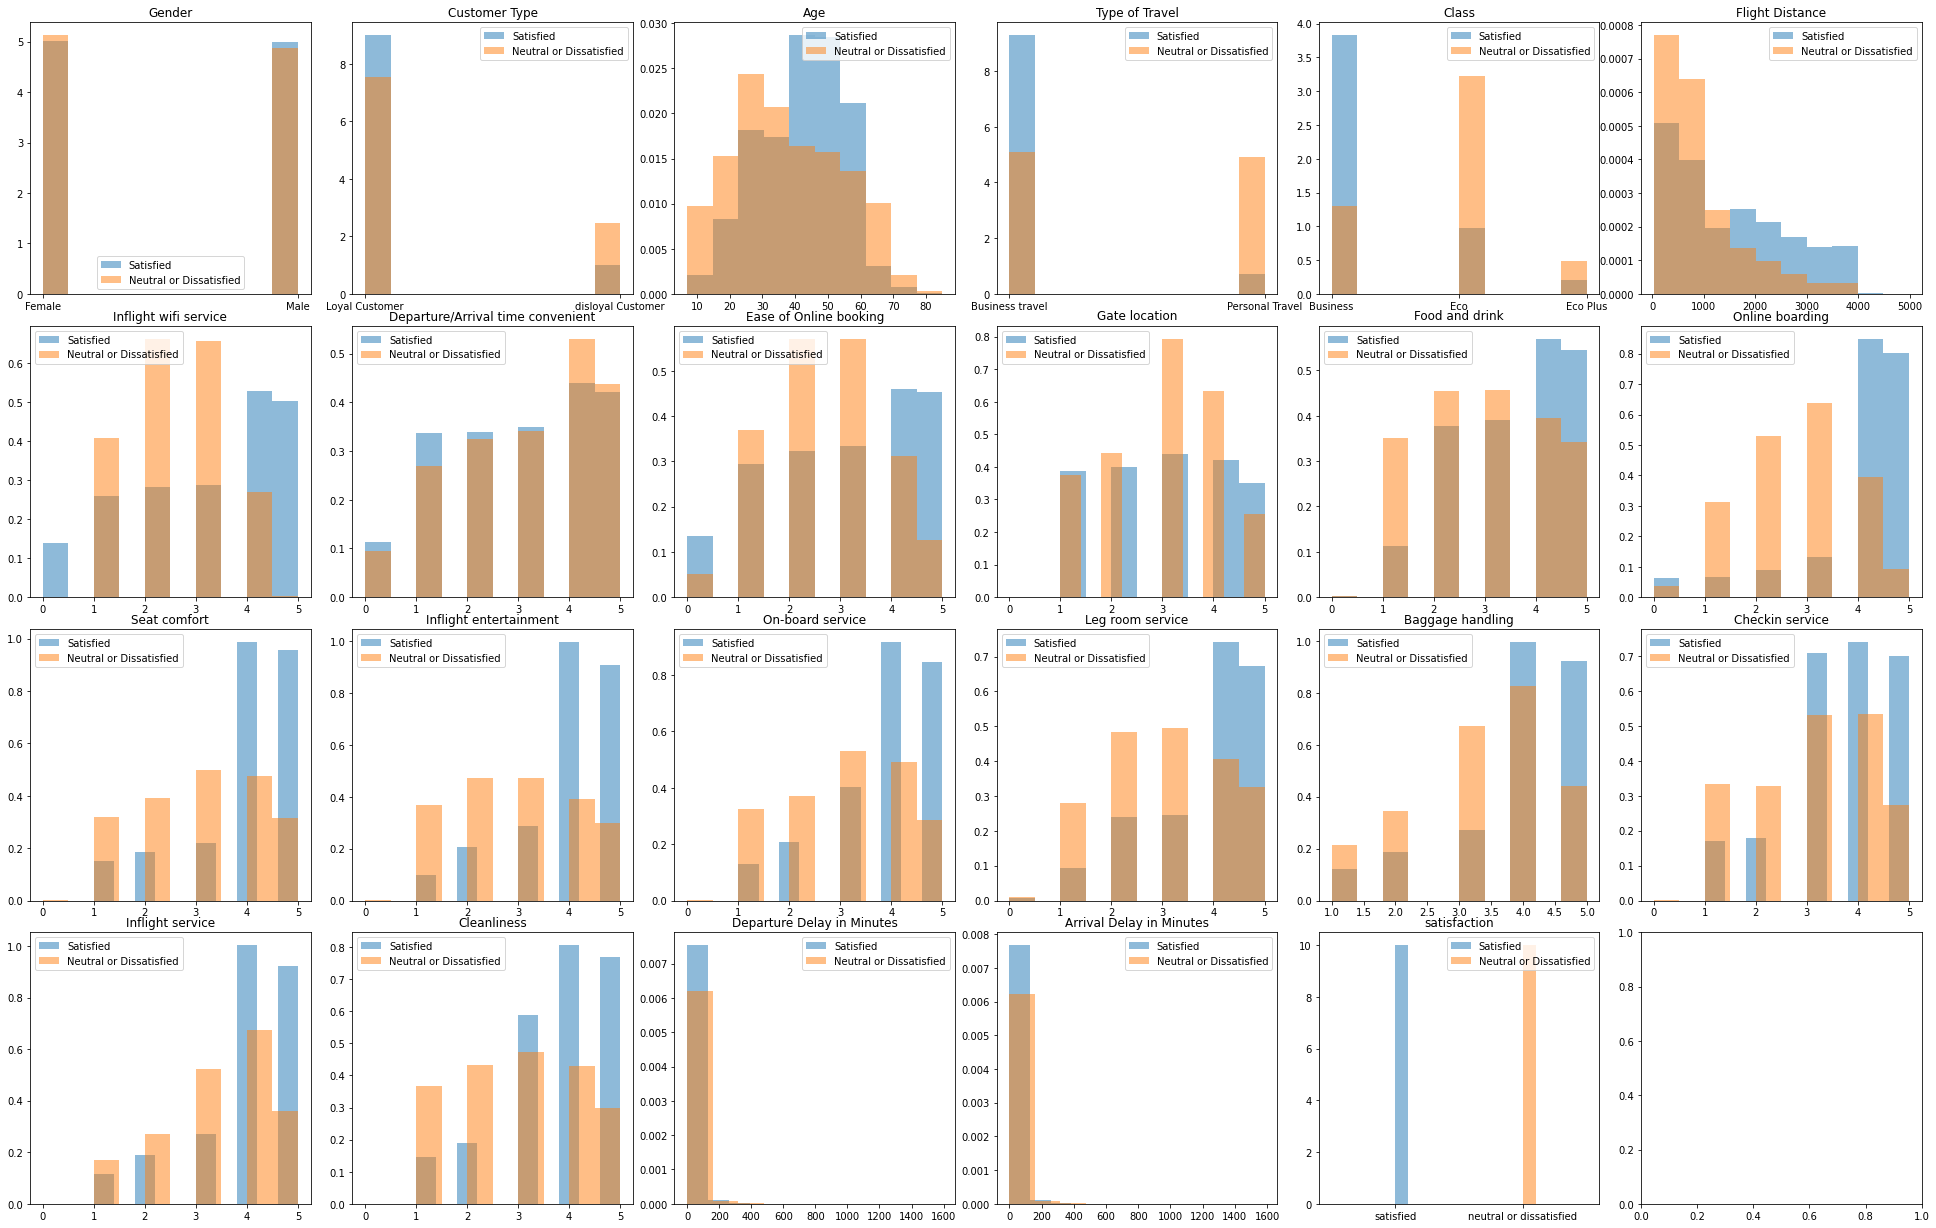

In [12]:
data_satisfied = data.query('satisfaction=="satisfied"')
data_not_satisfied = data.query('satisfaction=="neutral or dissatisfied"')

# Show the distribution for all attributes
fig, axs = plt.subplots(rows,columns, figsize=(27,17))   # initialize plot grid
fig.tight_layout()                                      # set layout
i = 0
for x in range(rows):                                      # Fill plot grid
    for y in range(columns):
        if i < data.shape[1]:
          axs[x,y].hist(data_satisfied[column_names[i]],alpha=.5, density=True)
          axs[x,y].hist(data_not_satisfied[column_names[i]],alpha=.5, density=True)
          axs[x,y].set(title=column_names[i])
          axs[x,y].legend(['Satisfied','Neutral or Dissatisfied'])
          i += 1


Satisfied customers tend to be older and business class travelers.

### 5-number Summary

In [13]:
data.select_dtypes('int64').describe().round(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
count,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00
mean,39.43,1190.21,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.64
std,15.12,997.56,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,37.93
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00
50%,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00
75%,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00


# Cross-Tabulations
Business passengers make up 92% of satisfied customers while personal travel is balanced between satisfied and unsatisfied.
This highly suggests that one of the main target markets for US airlines is business travelers.

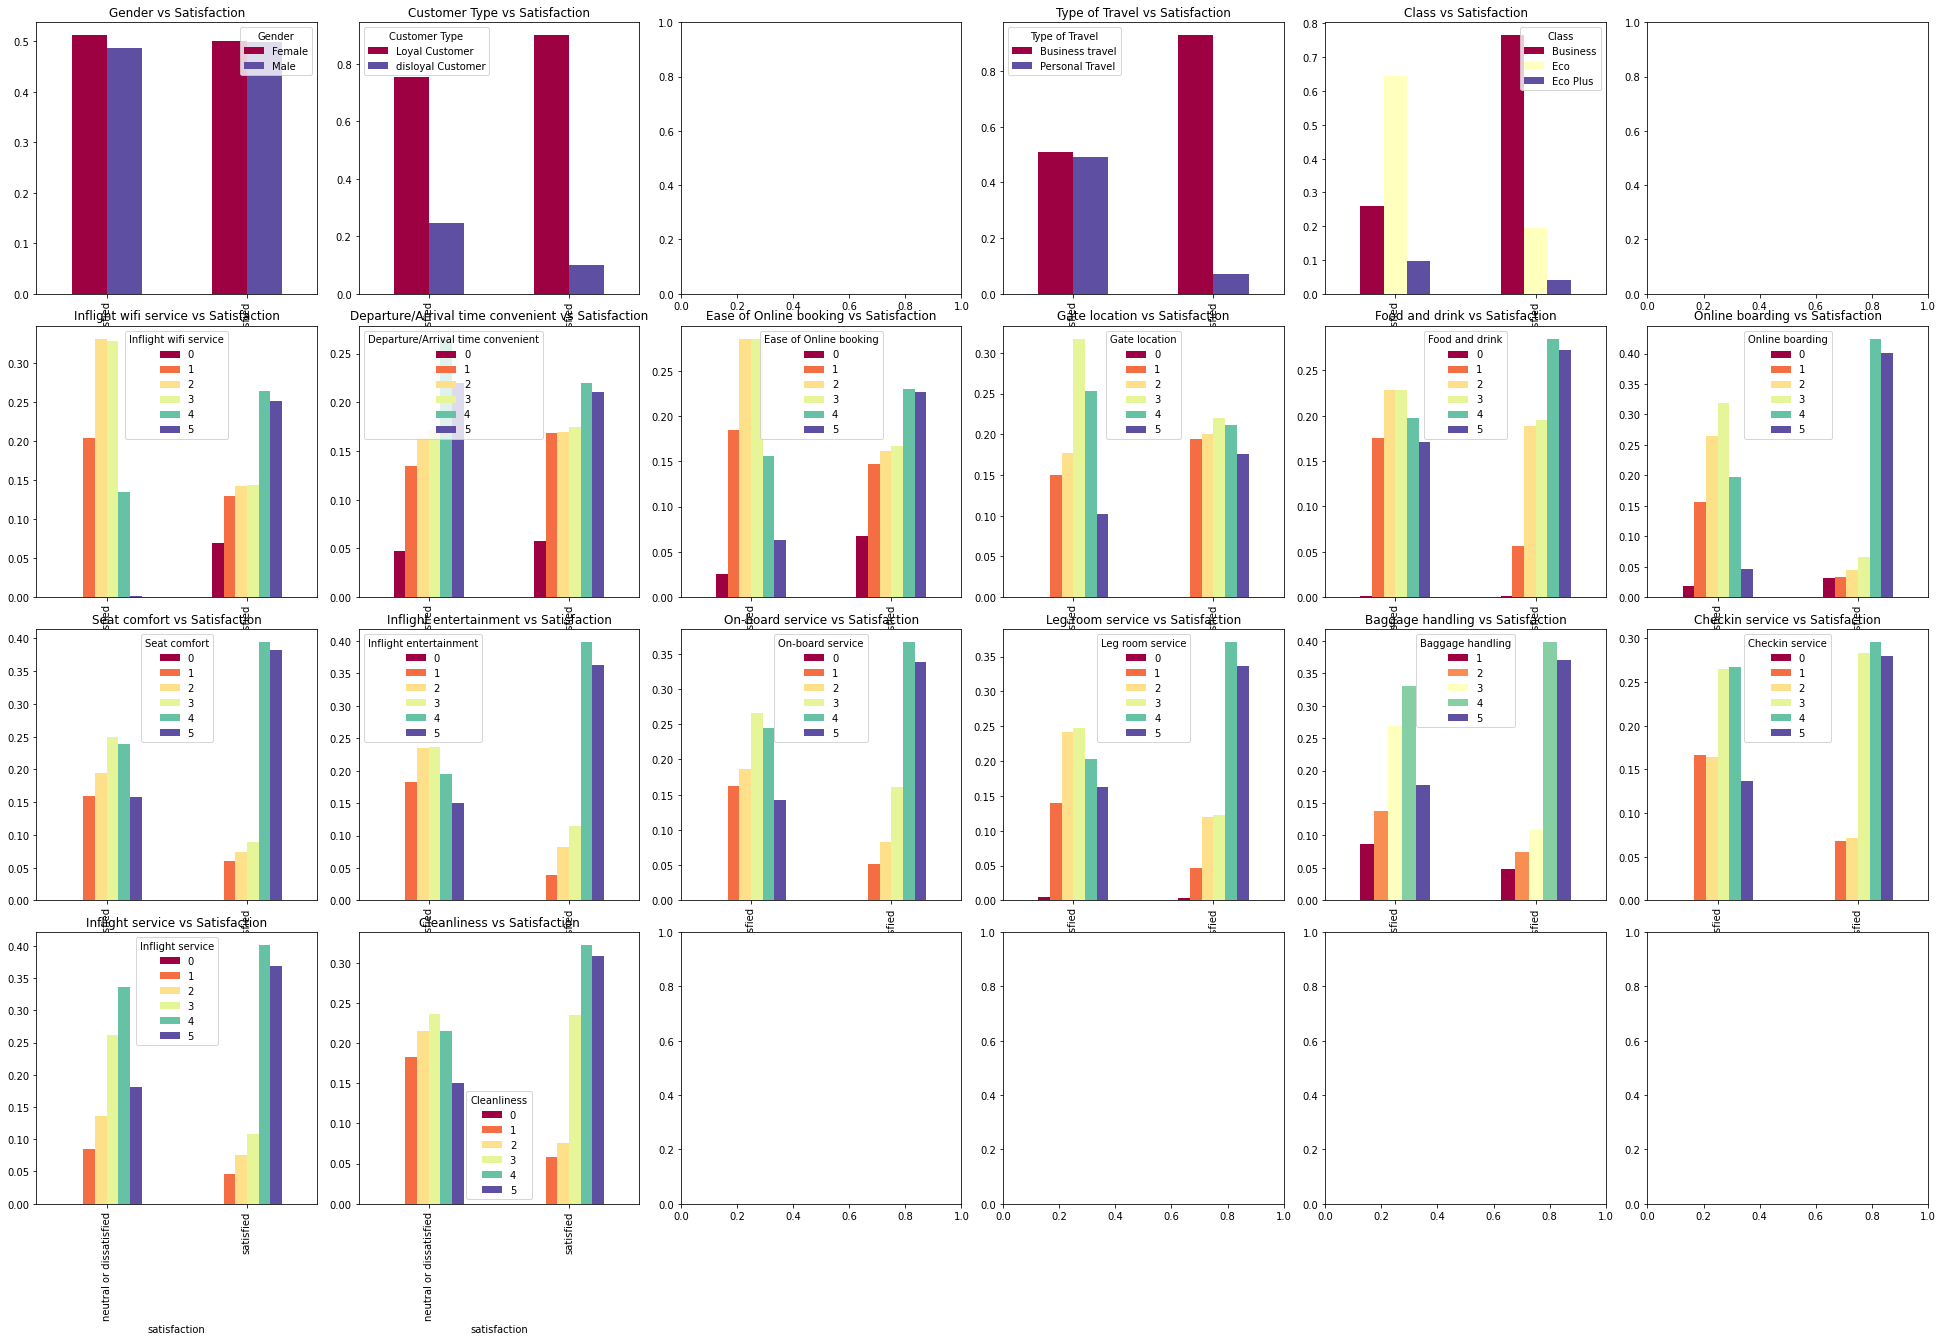

In [19]:
exclude = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction']
# Show the distribution for all attributes
fig, axs = plt.subplots(rows,columns, figsize=(27,17))   # initialize plot grid
fig.tight_layout()                                      # set layout
i = 0
for x in range(rows):                                      # Fill plot grid
    for y in range(columns):
        if i < data.shape[1] and data.columns[i] not in exclude:
            cross_tabulation = pd.crosstab(data['satisfaction'],data.iloc[:,i]).apply(lambda  x: round(x/x.sum(),4),axis=1)
            cross_tabulation.plot.bar(ax=axs[x,y],colormap='Spectral',
                                      title='{} vs Satisfaction'.format(data.columns[i]))
            i +=1
        else:

            i +=1

Mean age is 39.4 years old with a standard deviation of 15.1.

### Continuous Variable Outliers

In [ ]:
data_lst = [data['Arrival Delay in Minutes'], 
            data['Departure Delay in Minutes']] 
  
fig = plt.figure(figsize =(5, 6))

# Creating axes instance 
ax = fig.add_axes([0, 1, 1, 1]) 
  
# Creating plot 
ax.boxplot(data_lst)
plt.xticks([1, 2], [data_lst[0].name, data_lst[1].name])

plt.title('Arrival/Departure Delay in Minutes Boxplot', size=16)
plt.grid(True)
plt.ylabel('Minutes')

plt.show()

In [ ]:
plt.figure(figsize=(4,6))
plt.boxplot(data['Flight Distance'])
plt.title('Flight Distance Boxplot', size=16)
plt.xlabel('Flight Distance')
plt.ylabel('Miles')
plt.grid(True, alpha=0.8)
plt.show()

All 3 variables have a lot of outliers that are way above the top of the IQR range.

### Class Counts (Balance)

In [ ]:
target_counts = data['satisfaction'].value_counts()
plt.bar(target_counts.index.to_list(), target_counts)
plt.title('Class Counts', size=16)
plt.xlabel('Satisfaction', size=14)
plt.ylabel('Customer Count', size=14)
plt.show()

target_counts_pct = target_counts / target_counts.sum() * 100
print("\nDisatisfied or Neutral {:6.1f}%".format(target_counts_pct[0]))
print("Satisfied {:19.1f}%".format(target_counts_pct[1]))

The classes are disbalanced but not by much. There are slighly less satisfied customers (43.4%) than neutral or dissatisied (56.6%).

#### Normality

In [ ]:
data_skew_kurt = {"Kurtosis": data_dummies.kurt().abs(), 
        "Skewness": data_dummies.skew().abs()}

df = pd.concat(data_skew_kurt, axis = 1).round(2)

df = df[(df['Kurtosis'] > 1) | (df['Skewness'] > 1)]
df.sort_values(by=['Kurtosis'], ascending=False)

The variables above have an absolute value of Kurtosis or Skewness that are above 1 and therefore, are not close to being normally distributed. "Departure Delay in Minutes" and "Arrival Delay in Minutes" variables have extremely large kurtosis values.

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data['Age'], line='45')
plt.show()

## Correlations

In [ ]:
# most relevant correlation pairs
def plot_correlation_pairs(data, threshold):
  # plots correlation pairs with a given threshold

  # min-max normalization
  dummies_norm = (data - data.min()) / (data.max() - data.min())
  corr = dummies_norm.corr() # get pearson correlation matrix
  corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool)) # remove the lower half of the triangle

  corr_filtered = corr[abs(corr) >= threshold].stack().reset_index() # filter out low correlation values
  corr_filtered.columns = ['Pair1', 'Pair2', 'Coefficient'] # renaming columns
  corr_filtered = corr_filtered.sort_values(kind="quicksort", by='Coefficient') # sorting rows by "Coefficient"
  corr_filtered = corr_filtered.drop([23,25,24,39]) # dropping values that are the exact opposites of each other
  corr_filtered['Pair'] = corr_filtered.agg('{0[Pair1]} / {0[Pair2]}'.format, axis=1) # concetenate the pair columns
  corr_filtered = corr_filtered.set_index('Pair') # change index to Pair

  corr_filtered.plot(kind='barh', figsize=(10, 16), fontsize=12);
  plt.title('Correlation Pairs (for |corr| >'+str(threshold)+')', size=18);
  plt.grid(True, alpha=.5);
  plt.ylabel('Pair', size=16);
  plt.xlabel('Correlation Coefficient', size=16);

In [ ]:
cor_threshold = .3 # filters out correlations below the threshold

plot_correlation_pairs(data_dummies, cor_threshold)

In [ ]:
# correlation plot - filtered for values above .3 correlation
fig,ax = plt.subplots(figsize=(20,10))
c = data_dummies.corr()
threshold = c[np.abs(c)>=.3]
sns.heatmap(threshold,cmap='coolwarm')
plt.show()

Most of the correlation pairs are low or moderately correlated. Only few correlation pairs that come from the same predictors (such as Gender_Female, Gender_Male) have correlations that exceed 0.75. This means that we should have no issues with multicollinearity.

### Cluster Exploration

In [ ]:
def findBestClusters(data, max_k):
    # finds the optimal number of clusters using calinski_harabasz_score
    
    scores = []
    
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, max_iter=500, verbose=0)
        fit = kmeans.fit(data)
        score = metrics.calinski_harabasz_score(data, fit.labels_)
        
        scores.append(score)
        #print("k={:} {:.2f}".format(k, score))
        
    return scores

In [ ]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    # produces silhouettes plots
    
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []

    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    plt.show();
    
    return silhouette_avg

#### Find the optimal number of clusters

In [ ]:
predictors_s = MinMaxScaler().fit_transform(predictors) # scale the data

max_k = 20
scores = findBestClusters(predictors_s, max_k) # find the optimal number of clusters

In [ ]:
xaxis_clusters = [*range(2, max_k+1)]
plt.xticks(xaxis_clusters)
plt.plot(xaxis_clusters, scores)
plt.ylabel("Calinski Harabasz Score")
plt.xlabel("Cluster")
plt.title("Cluster number vs Score", size=16)
plt.show()

We get the highest Calinski Harabasz score if we assume 2 clusters. The optimal number of clusters appears to be 2.

#### Evaluation the clusters

In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
fit = kmeans_model.fit(predictors_s)
clusters = fit.predict(predictors_s)

In [ ]:
_, counts = np.unique(clusters, return_counts = True)
print(counts)

Both clusters are very similar in size

#### Class distribution of each cluster

In [ ]:
print("Completeness {:.4f}".format(completeness_score(target, clusters)))
print("Homogeneity {:.4f}".format(homogeneity_score(target, clusters)))

The completeness and homogeneity scores are very low. Low completeness score means that a lot of the data points that are members of a given class are not elements of the same cluster. Also, low homogeneity score means that the clusters contain a mix of both classes and are not uniform. The clusters do not represent the ground truth classes (satisfied or disatisfied/neutral).

In [ ]:
avg_silhouette = plot_silhouettes(predictors_s, clusters)
print(avg_silhouette)

The average Silhouette score across both clusters is very low, only 0.22. This means that the clusters are not defined well. If we look at the individual clusters in Silhouette plot we also see that most of the points in cluster 0 are well below the average score and very low in general. Cluster 1 looks reasonable as most of the points are above the average. Overall, this data does not seem to have well defined clusters.